## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)




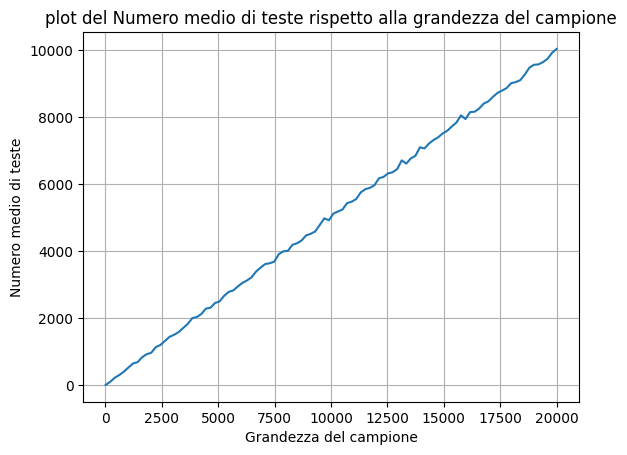

np.int64(20000)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lancio_moneta(N):
   campione = np.random.choice([0,1], size=N) 
   return (np.sum(campione)/N)*100


size = np.linspace(10, 20000, 100, dtype=int)
frequenza = np.array([lancio_moneta(n) for n in size])
print("Risultato dei 100 test")
print(frequenza)
print(size)
num_medio_testa = (frequenza*size)/100
plt.plot(size,num_medio_testa)
plt.title("plot del Numero medio di teste rispetto alla grandezza del campione")
plt.xlabel("Grandezza del campione")
plt.ylabel("Numero medio di teste")
plt.grid(True)
plt.show()
(size.max())

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mostrando insieme i dati di uomini e donne

Il dataset conta 891 righe e 12 colonne.

Numeri di valori mancanti per colonna 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


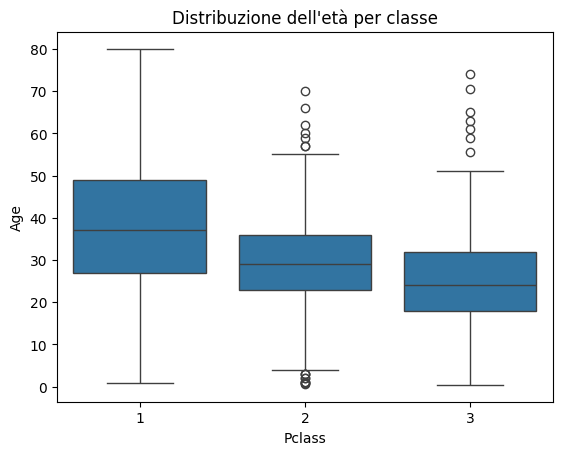

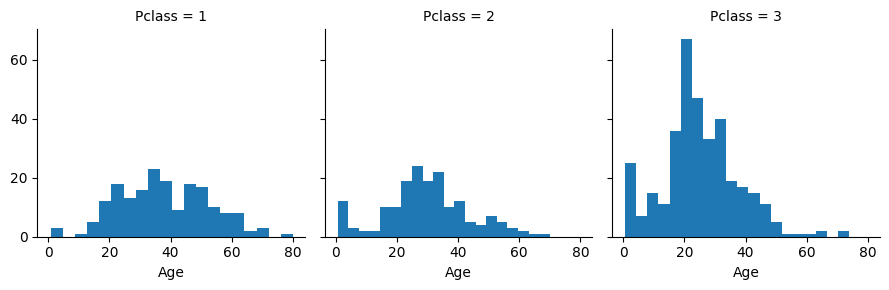

In [256]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
#1
print(f"Il dataset conta {df.shape[0]} righe e {df.shape[1]} colonne.\n")
#2
print("Numeri di valori mancanti per colonna ")
#3
print(df.isnull().sum(axis=0)) 
#4
modo = df["Embarked"].mode()[0]
df.loc[df["Embarked"].isnull(), "Embarked"] = modo

#5. Rimozione delle righe dove il valore di 'Age' è mancante
df = df.dropna(subset="Age")
# print(df.isnull().sum(axis=0)) 
# print("Numero di righe duplicate per colonna:")
dup = df[df.duplicated()].sum()
# print(dup)
# print("Eta media dei passegeri per ogni classe")
res = df.groupby("Pclass")["Age"].mean()
# print(res)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title("Distribuzione dell'età per classe")
plt.show()

g = sns.FacetGrid(df, col="Pclass")
g.map(plt.hist, "Age", bins=20)
plt.show()


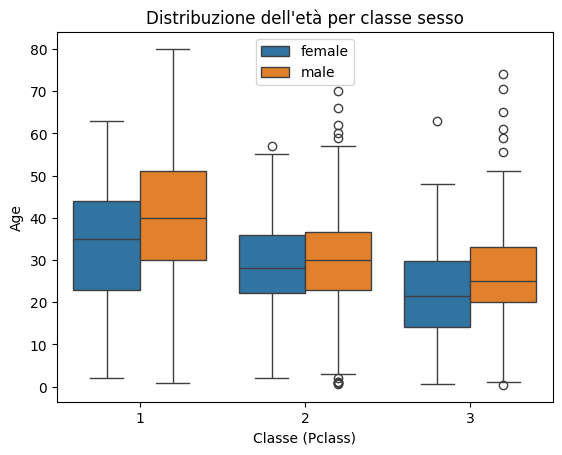

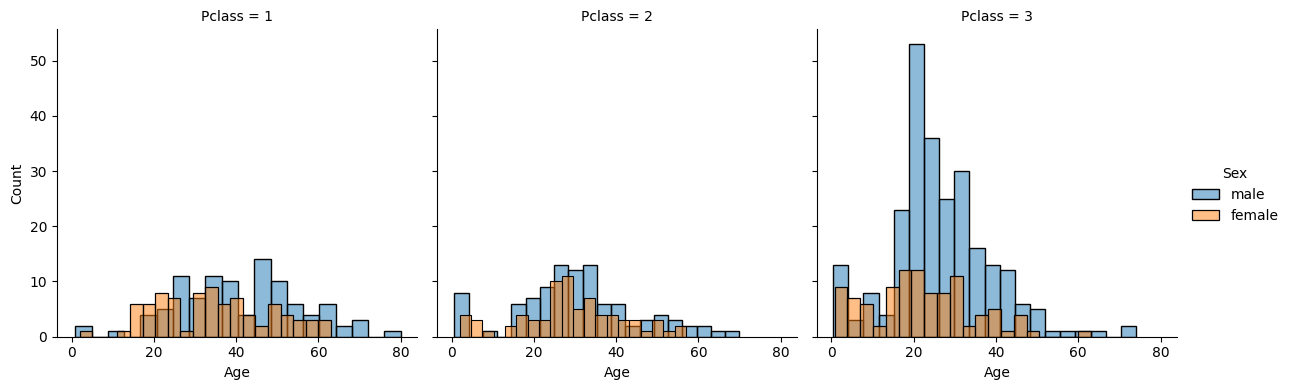

In [251]:
sns.boxplot(data=df, x='Pclass', y='Age', hue='Sex')

plt.title("Distribuzione dell'età per classe sesso")
plt.xlabel("Classe (Pclass)")
plt.ylabel("Age")
plt.legend()
plt.show()


g = sns.FacetGrid(df, col="Pclass", hue="Sex", height=4, aspect=1)
g.map(sns.histplot, "Age", bins=20, alpha=0.5)
g.add_legend()
plt.show()



## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

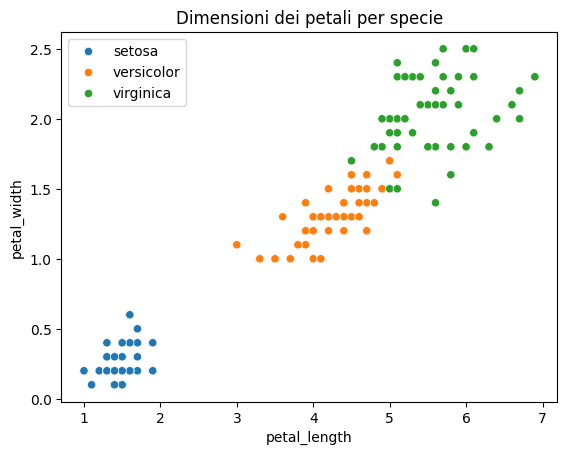

In [280]:
# count = df["species"].value_counts()
# print(f"Numero di campioni per specie:")
# print(count)
# lunghezza_med = df.groupby("species")["petal_length"].mean()
# larghezza_med = df.groupby("species")["petal_width"].mean()
# print("\nLunghezza media dei petali per specie")
# print(lunghezza_med)
# print("\nLunghezza media dei petali per specie")
# print(larghezza_med)

sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.title("Dimensioni dei petali per specie")
plt.legend()
plt.show()


Analisi della nuova variabile.
count    150.000000
mean       5.794067
std        4.712390
min        0.110000
25%        0.420000
50%        5.615000
75%        9.690000
max       15.870000
Name: petal_area, dtype: float64
            count     mean       std   min     25%     50%    75%    max
species                                                                 
setosa       50.0   0.3656  0.181155  0.11  0.2800   0.300   0.42   0.96
versicolor   50.0   5.7204  1.368403  3.30  4.8600   5.615   6.75   8.64
virginica    50.0  11.2962  2.157412  7.50  9.7175  11.445  12.79  15.87


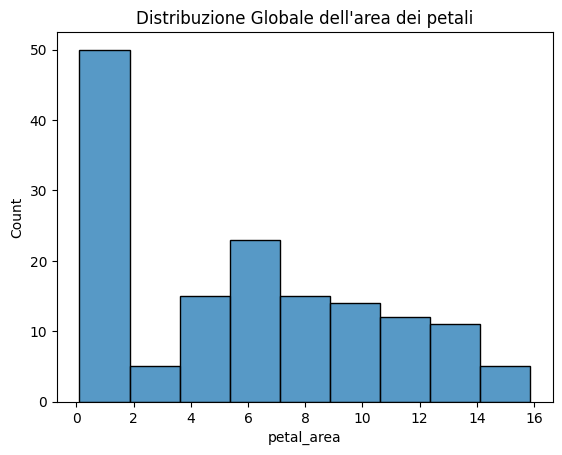

In [293]:
df["petal_area"] = df["petal_length"]*df["petal_width"]
print("Analisi della nuova variabile.")
print(df["petal_area"].describe())
gr = df.groupby("species")["petal_area"]
print(gr.describe())

sns.histplot(df, x="petal_area")
plt.title("Distribuzione Globale dell'area dei petali")
plt.show()

C:\Users\kasse\AppData\Local\Temp\ipykernel_31028\658994191.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


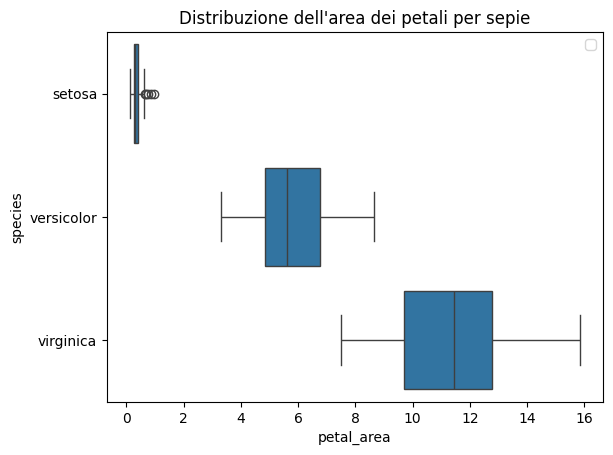

In [297]:
sns.boxplot(df, x="petal_area", y="species")
plt.legend()
plt.title("Distribuzione dell'area dei petali per sepie")
plt.show()